In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
df = pd.read_csv('caravan.csv')

df.describe()

,Customer Subtype,Number of houses,Avg size household,Avg Age,Customer main type,Roman catholic,Protestant,Other religion,No religion,Married,...,Number of private accident insurance policies,Number of family accidents insurance policies,Number of disability insurance policies,Number of re policies,Number of surfboard policies,Number of boat policies,Number of bicycle policies,Number of property insurance policies,Number of social security insurance policies,CARAVAN POLICY
count,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,...,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000
mean,24.253349,1.110615,2.678805,2.991240,5.773617,0.696496,4.626932,1.069907,3.258502,6.183442,...,0.005325,0.006527,0.004638,0.570079,0.000515,0.006012,0.031776,0.007901,0.014256,0.059773
std,12.846706,0.405842,0.789835,0.814589,2.856760,1.003234,1.715843,1.017503,1.597647,1.909482,...,0.072782,0.080532,0.077403,0.562058,0.022696,0.081632,0.210986,0.090463,0.119996,0.237087
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,1.000000,2.000000,2.000000,3.000000,0.000000,4.000000,0.000000,2.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,30.000000,1.000000,3.000000,3.000000,7.000000,0.000000,5.000000,1.000000,3.000000,6.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,35.000000,1.000000,3.000000,3.000000,8.000000,1.000000,6.000000,2.000000,4.000000,7.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,41.000000,10.000000,5.000000,6.000000,10.000000,9.000000,9.000000,5.000000,9.000000,9.000000,...,1.000000,1.000000,2.000000,7.000000,1.000000,2.000000,3.000000,2.000000,2.000000,1.000000


In [15]:
missing_values_per_column = df.isnull().sum()

for i in range(len(missing_values_per_column)):
    if missing_values_per_column.iloc[i] > 0:
        print(missing_values_per_column.index[i], missing_values_per_column.iloc[i])
    
    
# no missing values

Index(['Customer Subtype', 'Customer main type', 'Other relation', 'Singles',
       'High level education', 'Lower level education', 'High status',
       'Farmer', 'Social class A', 'Social class D', 'Rented house',
       'Home owners', 'No car', 'Private health insurance', 'Income < 30.000',
       'Income 45-75.000', 'Income 75-122.000', 'Purchasing power class',
       'Contribution private third party insurance',
       'Contribution car policies', 'Contribution moped policies',
       'Contribution family accidents insurance policies',
       'Contribution disability insurance policies',
       'Contribution fire policies', 'Contribution boat policies',
       'Contribution social security insurance policies',
       'Number of private third party insurance', 'Number of car policies',
       'Number of boat policies',
       'Number of social security insurance policies'],
      dtype='object')


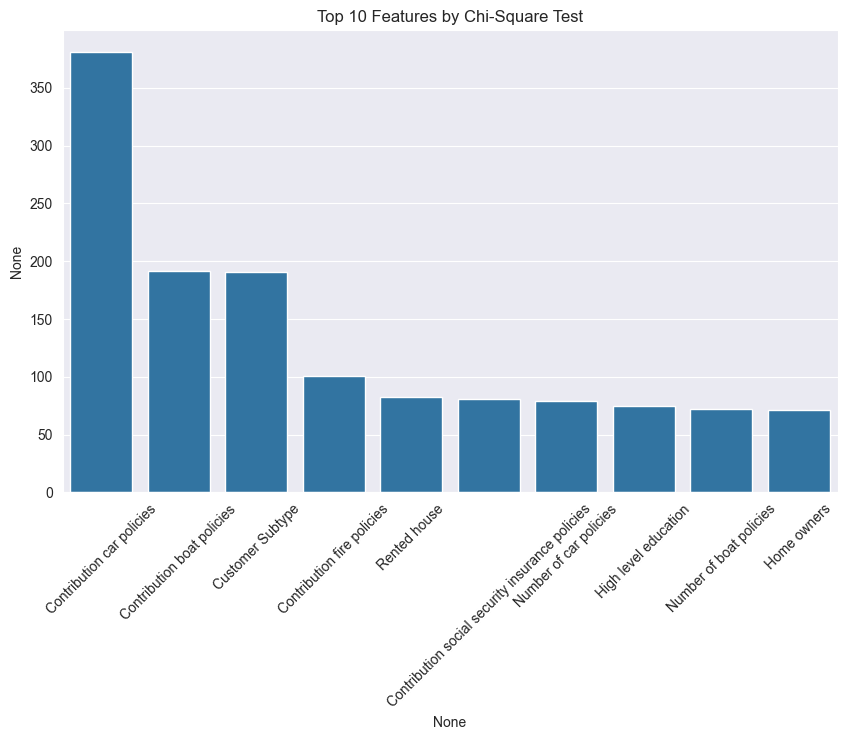

In [41]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


# looking at feature documentation shows that all the features are categorical. We can try a chi-squared test to get a preliminary selection:

X = df.drop(columns='CARAVAN POLICY')
y = df['CARAVAN POLICY']

chi2_selector = SelectKBest(chi2, k=30)
X_kbest = chi2_selector.fit_transform(X, y)

selected_features = X.columns[chi2_selector.get_support()]
print(selected_features)

chi2_scores = pd.Series(chi2_selector.scores_, index=X.columns).sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=chi2_scores.index, y=chi2_scores)
plt.title('Top 10 Features by Chi-Square Test')
plt.xticks(rotation=45)
plt.show()

reduced_x = X[selected_features]

In [35]:
# more generally, we can also try recursive feature elimination on the preliminary selection:

from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

rfe = RFE(model, n_features_to_select=15) 
rfe.fit(reduced_x, y)

selected_features = reduced_x.columns[rfe.support_]
print(selected_features)

Index(['Customer Subtype', 'Customer main type', 'High level education',
       'Lower level education', 'High status', 'Social class A',
       'Social class D', 'Rented house', 'Home owners', 'No car',
       'Income < 30.000', 'Purchasing power class',
       'Contribution private third party insurance',
       'Contribution fire policies', 'Number of car policies'],
      dtype='object')


In [36]:
# there is also the lasso feature selection approach, which will via regularization shrink unimportant features. Interestingly, it selects different features from RFE

from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

lasso = Lasso(alpha=0.01)  # You can tune the alpha value
lasso.fit(X_scaled, y)

selected_features = X.columns[lasso.coef_ != 0]
print(selected_features)

Index(['Married', 'High level education', 'Lower level education', 'Farmer',
       'Rented house', '1 car', 'Average income', 'Purchasing power class',
       'Contribution private third party insurance',
       'Contribution car policies', 'Contribution fire policies',
       'Number of boat policies',
       'Number of social security insurance policies'],
      dtype='object')


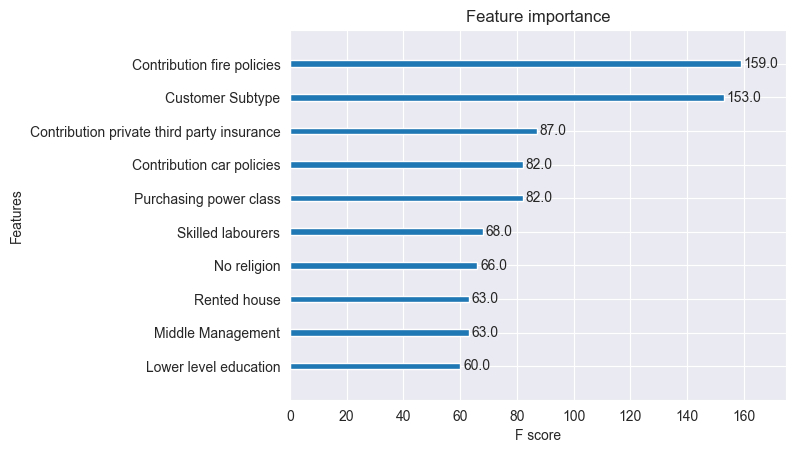

In [42]:
from xgboost import XGBClassifier
import xgboost as xgb
from matplotlib import pyplot as plt

X.columns = X.columns.str.replace(r'[\[\]<]', '', regex=True)

xgb_model = XGBClassifier()
xgb_model.fit(X, y)  # Fit the model

xgb.plot_importance(xgb_model, max_num_features=10)
plt.show()

In [28]:
# a lot of the features here are highly correlated with each other, so we can try PCA to reduce the dimensionality of the data.

from sklearn.decomposition import PCA

pca = PCA(n_components=10)  
X_pca = pca.fit_transform(X)

print(pca.explained_variance_ratio_)

[0.59220949 0.09654634 0.03977784 0.02950337 0.02787799 0.02377883
 0.01692817 0.01446664 0.0135779  0.01285179]
